# Getting data from the web for analytics wizardry

There are several different ways of getting your hands on good and interesting datasets for use in data science or business analytics projects (whether they be for personal learning, research, or commercial endeavors). In this notebook we'll explore a variety of sources and techniques ranging from:

* downloading and opening of CSV and JSON files
* web scraping using things like Beautiful Soup
* using web APIs (Application Programming Interfaces)

We'll see examples using both Python and R. I'll also include a bunch of links to data sources.

## Credits

There are a wealth of good resources both on and off the web for this topic. I have adapted material from a number of them throughout this document. I thank them. They include:

* [Data wrangling with Python](http://shop.oreilly.com/product/0636920032861.do)
* [CS109 course at Harvard](http://cs109.github.io/2014/)

 - [Data scraping notebook](http://nbviewer.ipython.org/github/cs109/2014/blob/master/lectures/2014_09_23-lecture/data_scraping_transcript.ipynb) (by Verena Kaynig-Fittkau)
 - [HW1-HW3 from 2013 class](https://github.com/cs109/content)
 
* [Python for Data Analysis](http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793) (book by Wes McKinney)
* [R for Everyone](http://www.amazon.com/Everyone-Advanced-Analytics-Graphics-Addison-Wesley/dp/0321888030/ref=sr_1_1?s=books&ie=UTF8&qid=1434717910&sr=1-1&keywords=r+for+everyone) (book by Jared Lander)
* [programmingforbiologists.org](http://www.programmingforbiologists.org/)
* http://www.r-bloggers.com/better-handling-of-json-data-in-r/
* http://blog.danwin.com/examples-of-web-scraping-in-python-3-x-for-data-journalists/
* http://web.stanford.edu/~zlotnick/TextAsData/Web_Scraping_with_Beautiful_Soup.html

In [3]:
## all imports
from IPython.display import HTML
from IPython.display import Image

import numpy as np
# urllib is part of the standard library in Python 2
# In Python 3, urllib has been reorganized into component libraries
# See https://docs.python.org/3/library/urllib.html
import urllib.request # For opening URLs
import urllib.parse   # For parsing web pages

import bs4 #this is Beautiful Soup

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
#sns.set_context("talk")
#sns.set_style("white")

In [4]:
%matplotlib inline

## Automated downloading of data files

In R or Python it is easy to download data files from websites if have the URL to the file. 

### CSV files

In Python, it's just as easy as it was in R. See p155-160 in "Python for Data Analysis" or the pandas documentation on the `read_csv` function at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html.

In [5]:
acs = pd.read_csv('https://jaredlander.com/data/acs_ny.csv') # Defaults are comma separated and first row is header
acs.describe()

FamilyIncome   NumBedrooms   NumChildren     NumPeople      NumRooms  \
count  2.274500e+04  22745.000000  22745.000000  22745.000000  22745.000000   
mean   1.102814e+05      3.385315      0.901165      3.390459      7.174764   
std    1.004539e+05      1.092477      1.159535      1.407659      2.345623   
min    5.000000e+01      0.000000      0.000000      2.000000      1.000000   
25%    5.254000e+04      3.000000      0.000000      2.000000      6.000000   
50%    8.700000e+04      3.000000      0.000000      3.000000      7.000000   
75%    1.338000e+05      4.000000      2.000000      4.000000      8.000000   
max    1.605000e+06      8.000000     12.000000     18.000000     21.000000   

        NumVehicles    NumWorkers    HouseCosts  ElectricBill     Insurance  
count  22745.000000  22745.000000  22745.000000  22745.000000  22745.000000  
mean       2.112640      1.744647   1480.471840    175.022950    960.924071  
std        0.969129      0.822566   1150.248288    106.705696    995.461359  
min        0.000000      0.000000      4.000000      1.000000      0.000000  
25%        2.000000      1.000000    650.000000    100.000000    400.000000  
50%        2.000000      2.000000   1200.000000    150.000000    720.000000  
75%        3.000000      2.000000   2000.000000    220.000000   1200.000000  
max        6.000000      3.000000   7090.000000    580.000000   6600.000000

Both R and Python's functions for reading CSV or general tabular text files have numerous options for dealing with specific features of the data file:

* separator
* which (if any) row to use as a header
* if and how to parse date fields
* whether or not string fields are enclosed in quotes
* characters to treat as comments

and many more. See the documentation for `read.csv`/`read.table` in R and `read_csv`/`read_table` in Pandas.

### JSON files

While CSV is a great format for tabular data, not all data is tabular. [JSON](http://json.org/) (Javascript Object Notation) is a very lightweight and readable data interchange format. It is quite popular for moving data between browsers and other apps. It is based on key-value pairs, looks very much like Python dictionaries, and is very flexible in terms of accomodating data formats other than tables. Here's a little example. It's an `employees` object containing an array of three employees.


    {"employees":[
        {"firstName":"John", "lastName":"Doe"},
        {"firstName":"Anna", "lastName":"Smith"},
        {"firstName":"Peter", "lastName":"Jones"}
    ]}


In Python terms, the above is a dictionary containing a list of dictionaries.

JSON is great when you have hierarchical data. It's plain text. It's language agnosistic. Most programming languages have some sort of capability for reading and writing JSON files. Within Python, it's built in. Yep, it's a simple as: 

In [6]:
import json

The very first week of class we saw how every single vote taken in the US Congress is stored in JSON format and is available to anyone with a web browser. Here's a single bill and its vote. Let's get it into Python.

[https://www.govtrack.us/data/congress/113/votes/2013/h104/data.json](https://www.govtrack.us/data/congress/113/votes/2013/h104/data.json)

Let's do this two different ways. First we'll use the built in `urllib` module along with the `json` module. Then we'll use the popular Requests module.

#### Using urllib and json

In [7]:
import urllib.request # For opening URLs
import json

vote_url = 'https://www.govtrack.us/data/congress/113/votes/2013/h104/data.json'
vote_data1 = urllib.request.urlopen(vote_url)

# Unfortunately, vote_data1 isn't a JSON string, it's a bytes object. Let's convert.
# See http://stackoverflow.com/questions/6862770/python-3-let-json-object-accept-bytes-or-let-urlopen-output-strings
str_vote_data1 = vote_data1.read().decode('utf-8')

# Now open it using json module
vote1 = json.loads(str_vote_data1)

Now the onus is on you to figure out the structure of the JSON file and how to pull out what you want. **Remember, in general it's going to be a dictionary of things where those things are lists of other things.** Let's figure out what this vote was about and who wasn't present for it.

In [8]:
# What are the highest level keys in the dictionary?
vote1.keys()

dict_keys(['question', 'vote_id', 'congress', 'result_text', 'chamber', 'date', 'category', 'bill', 'number', 'subject', 'updated_at', 'votes', 'requires', 'result', 'type', 'source_url', 'session'])

In [9]:
# Print out some info about this vote
print(vote1['vote_id'] + "\n")
print(vote1['subject'])
print("\n" + vote1['result'])

h104-113.2013

To prohibit the awarding of a contract or grant in excess of the simplified acquisition threshold unless the prospective contractor or grantee certifies in writing to the agency awarding the contract or grant that the contractor or grantee has no seriously delinquent tax debts, and for other purposes

Passed


In [10]:
# Guessing that votes is another dictionary. What are its keys?
vote1['votes'].keys()

dict_keys(['Not Voting', 'Present', 'Nay', 'Yea'])

In [11]:
# Perfect, let's see the list of people not voting.
vote1['votes']['Not Voting']

[{'display_name': 'Brown (FL)', 'id': 'B000911', 'party': 'D', 'state': 'FL'},
 {'display_name': 'Clarke', 'id': 'C001067', 'party': 'D', 'state': 'NY'},
 {'display_name': 'Clay', 'id': 'C001049', 'party': 'D', 'state': 'MO'},
 {'display_name': 'Cleaver', 'id': 'C001061', 'party': 'D', 'state': 'MO'},
 {'display_name': 'Courtney', 'id': 'C001069', 'party': 'D', 'state': 'CT'},
 {'display_name': 'Davis, Rodney',
  'id': 'D000619',
  'party': 'R',
  'state': 'IL'},
 {'display_name': 'Fincher', 'id': 'F000458', 'party': 'R', 'state': 'TN'},
 {'display_name': 'Gohmert', 'id': 'G000552', 'party': 'R', 'state': 'TX'},
 {'display_name': 'Hastings (FL)',
  'id': 'H000324',
  'party': 'D',
  'state': 'FL'},
 {'display_name': 'Honda', 'id': 'H001034', 'party': 'D', 'state': 'CA'},
 {'display_name': 'Huizenga (MI)',
  'id': 'H001058',
  'party': 'R',
  'state': 'MI'},
 {'display_name': 'Keating', 'id': 'K000375', 'party': 'D', 'state': 'MA'},
 {'display_name': 'Lummis', 'id': 'L000571', 'party': 

#### Using requests

Requests was developed to ease the pain of the original urllib2 module. [http://docs.python-requests.org/en/latest/](http://docs.python-requests.org/en/latest/).

In [12]:
import requests

vote_url = 'https://www.govtrack.us/data/congress/113/votes/2013/h104/data.json'

vote_data2 = requests.get(vote_url).text
vote2 = json.loads(vote_data2)  # load a json string into a collection of lists and dicts
print(vote2.keys())

dict_keys(['question', 'vote_id', 'congress', 'result_text', 'chamber', 'date', 'category', 'bill', 'number', 'subject', 'updated_at', 'votes', 'requires', 'result', 'type', 'source_url', 'session'])


### What about R and JSON?

R has a number of packages for working with JSON data, including:

* rjson
* RJSONIO
* jsonlite

A post at R-Bloggers entitled [Better handling of JSON data in R?](http://www.r-bloggers.com/better-handling-of-json-data-in-r/) is quite useful and includes links to a terrific set of [course materials for web scraping with R course](http://quantifyingmemory.blogspot.co.uk/2014/02/web-scraping-basics.html).

CRAN has a comprehensive list of resources for working with web data in R.

* [R resources for working with web data](http://cran.r-project.org/web/views/WebTechnologies.html)


## Web scraping

We'll start with low level scraping where you parse the data out of the html code of a webpage. This can either be pretty easy or pretty painful depending on the structure of the webpage you are trying to scrape and which tools you use for the job. 

* scraping exploits the structure and content of HTML tags 
* web pages can be complicated and thus difficult to scrape
* the structure of web pages tend to change over time
* a number of tools have been created to make this easier

### HTML


* HyperText Markup Language

* standard for creating webpages

* HTML tags 
    - have angle brackets
    - typically come in pairs
    

### A few useful tags


* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`

This is an example for a minimal webpage defined in HTML tags. The root tag is `<html>` and then you have the `<head>` tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The `<body>` tag marks the actual content of the page. You can play around with the `<hn>` tags trying different header levels. They range from 1 to 6. 

In [13]:
s = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h1> first Header 1 </h1>
        <p>Hello world from first header 1!</p>
    <h1> second Header 1 </h1>
        <p>Hello world from second header 1!</p>
        <h2> first Header 2 </h2>
        <ul>
            <li> first item </li>
            <li> second item </li>
            <li> third item </li>
        </ul>
        <h2> another Header 2 </h2>
        <p> You can't make a half sandwich. It's not half of a whole sandwich, it's just a small sandwich. </p>
  </body>
</html>"""

h = HTML(s)
h

### Scraping with Python

There are a number of useful modules for trying to pull useful information out of HTML. 

* [urllib2](https://docs.python.org/2/library/urllib2.html)
* [urllib](https://docs.python.org/3/library/urllib.html) - part of standard library for Python 3
* [Requests](http://docs.python-requests.org/en/latest/)
* [Beautiful Soup](http://www.crummy.com/software/BeautifulSoup/)
* [pattern](http://www.clips.ua.ac.be/pattern) - not available for Python 3
* [lxml](http://lxml.de/)
* ...
    

The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [14]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = urllib.request.urlopen(url).read()
# print (source)
print(type(source))
# Source is a bytes object. Let's create a string version for convenience.
source_str = str(source)
print(type(source_str))

<class 'bytes'>
<class 'str'>


In [15]:
print(source_str)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"\n"http://www.w3.org/TR/REC-html40/transitional.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<title>Beautiful Soup: We called him Tortoise because he taught us.</title>\n<link rev="made" href="mailto:leonardr@segfault.org">\n<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">\n<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">\n<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">\n<meta name="author" content="Leonard Richardson">\n</head>\n<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">\n<img align="right" src="10.1.jpg" width="250"><br />\n\n<p>You didn\'t write that awful page. You\'re just trying to get some\ndata out of it. Beautiful Soup is here to help. Since 2004, it\'s been\nsaving programmers hours or days of work on quick-turnaround\nscreen sc

### Quick Quiz 

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'TopoGrabber' ?
    - hint: use `.find()`

In [ ]:
## is 'Alice' in source_str? What about 'Leondard'?


In [ ]:
## count occurences of 'Soup' in source_str


In [ ]:
## find index of 'TopoGrabber' in source_str

position = ???
print(position)

## quick test to see the substring in the source variable
## you can access strings like lists
print (source_str[position:position + 20])

## or the tidier version:
print (source_str[position:position + len('TopoGrabber')])

### Quick Quiz Answers

In [16]:








## is 'Alice' in source_str?
print('Alice' in source_str)

## count occurences of 'Soup' in source_str
print (source_str.count('Soup'))

## find index of 'TopoGrabber' in source_str
position =  source_str.find('TopoGrabber')
print (position)

## quick test to see the substring in the source variable
## you can access strings like lists
print (source_str[position:position + 20])

## or the tidier version:
print (source_str[position:position + len('TopoGrabber')])

False
43
6735
TopoGrabber</a>, a s
TopoGrabber


### Beautiful Soup

Beautiful Soup is a relatively simple tool for doing web scraping of HTML and XML pages.

http://www.crummy.com/software/BeautifulSoup

* designed to make your web scraping life easier
* many good functions for parsing html code

The documentation for BS is very good. https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Now we create a beautiful soup object from the string variable `source_str`. Note that the `prettify()` function formats the output to show the different levels of the HTML code. 

In [17]:
## get bs4 object
soup = bs4.BeautifulSoup(source_str)
 
## compare the two print statements
#print (soup)
print (soup.prettify())



<html>
 <body>
  <p>
   b'
   <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
   n"http://www.w3.org/TR/REC-html40/transitional.dtd"&gt;\n\n
  </p>
  \n
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  \n
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  \n
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  \n
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  \n
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  \n
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  \n
  <meta content="Leonard Richardson" name="author"/>
  \n\n\n
  <img align="right" src="10.1.jpg" width="250"/>
  <br/>
  \n\n
  <p>
   You didn\'t write that awful page. You\'re just trying to get some\ndata out of it. Beautiful Soup is here to help. Since 2004, it\'s been\nsaving programmers hours or days of work on quic

/home/mark/anaconda3/envs/hselab/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /home/mark/anaconda3/envs/hselab/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


One of the more common web scraping tasks is to find all occurences of a specific tag. Let's find all the anchor tags, `a`.

In [18]:
## show how to find all a tags. Notice the return type.
soup.findAll('a')

## ***Why does this not work? ***
# soup.findAll('Soup')

[<a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="#Download">Download</a>,
 <a>Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="zine/"><i>Tool Safety</i></a>,
 <a>the discussion\ngroup</a>,
 <a href="https://bugs.launchpad.net/beautifulsoup/">file it</a>,
 <a>lxml</a>,
 <a>html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a name="Download"><h2>Download Beautiful Soup</h2></a>,
 <a href="bs4/download/">Beautiful Soup\n4.6.0</a>,
 <a>Here\'s\nthe Beautiful Soup 3 documentation.</a>,
 <a>3.2.1</a>,
 <a name="HallOfFame"><h2>Hall of Fame</h2></a>,
 <a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable\n Type"</a>,
 <a>parse\na page that\'s been linked to and find a representative image</a>,
 <a href="http://www.harrowell.org.uk/viktormap.html">t

To find just the first occurence of a tag, use `find` instead of `findAll`. Then let's:

* see all the available attributes of that tag (what Python data structure is used?)
* see a few ways to reference attributes of that tag.

In [19]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags in the string
first_tag = soup.find('a')
print('first_tag is a: ', type(first_tag))
print(first_tag.attrs)

## get attribute `href`
print(first_tag.get('href'))

# Can also do this by treating objects as dictionaries
first_tag['href']



first_tag is a:  <class 'bs4.element.Tag'>
{'href': 'bs4/download/'}
bs4/download/


'bs4/download/'

#### Find all the links on a page
Another common web scraping tasks is to find all the links on a page. We can use our friend the list comprehension.

In [20]:
## get all links in the page using list comprehension
link_list = [l.get('href') for l in soup.findAll('a')]



In [22]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l.startswith('http'):
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

AttributeError: 'NoneType' object has no attribute 'startswith'

In [ ]:
# lets investigate. Have a close look at the link_list:
print(link_list)

# Seems that there are None elements!
# Let's verify
print (sum([l is None for l in link_list]))

# So there are quite a few elements in the list that are None!

In [23]:
# Let's filter those objects out in the for loop
external_links = [l for l in link_list if l is not None and l.startswith('http')]
       
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://www2.ljworld.com/',
 'http://esrl.noaa.gov/gsd/fab/',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://creativecommons.org/licenses/by-sa/2.0/',
 'http://creativecommons.org/licenses/by-sa/2.0/',
 'http://www.crummy.com/',
 'http://www.crummy.com/software/',
 'http://www.crummy.com/software/BeautifulSoup/']

Note: The above `if` condition works because of *lazy evaluation* in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

#### Parsing the document tree with Beautiful Soup

A web page DOM (document object model) can be thought of as a type of family tree. Objects at the same level are *siblings* while from the perspective of a current object, *parents* are higher up in the tree and *children* are further down.

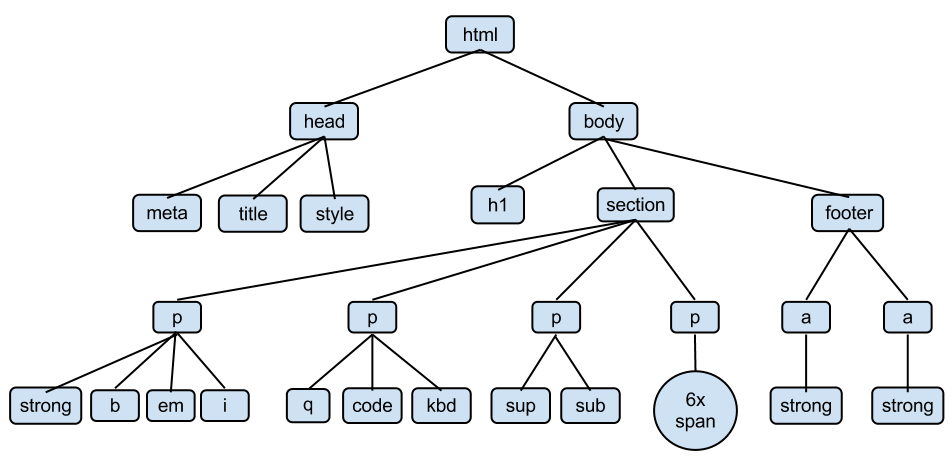

In [24]:
Image('http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png')

Recall our simple web page stored in the string `s`.

In [25]:
print(s)

<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h1> first Header 1 </h1>
        <p>Hello world from first header 1!</p>
    <h1> second Header 1 </h1>
        <p>Hello world from second header 1!</p>
        <h2> first Header 2 </h2>
        <ul>
            <li> first item </li>
            <li> second item </li>
            <li> third item </li>
        </ul>
        <h2> another Header 2 </h2>
        <p> You can't make a half sandwich. It's not half of a whole sandwich, it's just a small sandwich. </p>
  </body>
</html>


In [28]:
## get bs4 object

simple_tree = bs4.BeautifulSoup(s, "lxml")

The lxml parameter value is specifying which xml/html parser to use. http://lxml.de/

In [27]:
print(simple_tree.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   This is a title
  </title>
 </head>
 <body>
  <h1>
   first Header 1
  </h1>
  <p>
   Hello world from first header 1!
  </p>
  <h1>
   second Header 1
  </h1>
  <p>
   Hello world from second header 1!
  </p>
  <h2>
   first Header 2
  </h2>
  <ul>
   <li>
    first item
   </li>
   <li>
    second item
   </li>
   <li>
    third item
   </li>
  </ul>
  <h2>
   another Header 2
  </h2>
  <p>
   You can't make a half sandwich. It's not half of a whole sandwich, it's just a small sandwich.
  </p>
 </body>
</html>


In [29]:
simple_tree.title

<title>This is a title</title>

Earlier we saw that the `findAll` method can be used to find all occurences of a specified tag. This is such a common task that BS has this shortcut (or *syntactic sugar*).

In [30]:
simple_tree('h2')

[<h2> first Header 2 </h2>, <h2> another Header 2 </h2>]

In [31]:
# Is the following equivalent to find or findAll?
simple_tree.h2

<h2> first Header 2 </h2>

In [32]:
## Can directly access body
print(simple_tree.body)

<body>
<h1> first Header 1 </h1>
<p>Hello world from first header 1!</p>
<h1> second Header 1 </h1>
<p>Hello world from second header 1!</p>
<h2> first Header 2 </h2>
<ul>
<li> first item </li>
<li> second item </li>
<li> third item </li>
</ul>
<h2> another Header 2 </h2>
<p> You can't make a half sandwich. It's not half of a whole sandwich, it's just a small sandwich. </p>
</body>


#### Searching from "entry points"
Sometimes we want to start search down the tree from a particular starting point. For example, maybe we only want links on a page that are in a list as opposed to in a paragraph.

Now let's try to create a list of all the links in the __Hall of Fame__ entries listed on the Beautiful Soup webpage. We'll exploit the fact that they are in the only unordered list in the page (tag `ul`)

In [49]:
## use ul as entry point
entry_point = soup.find('ul')


## Let's try to use list comprehension to get the links. 
hall_of_fame_list = [l.get('href') for l in entry_point.findAll('a')]



In [50]:
hall_of_fame_list

['http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 None,
 'http://www.harrowell.org.uk/viktormap.html',
 None,
 'http://www2.ljworld.com/',
 None,
 'http://esrl.noaa.gov/gsd/fab/',
 None]

Hmm, seems that BS is having trouble with a few of the URLs. My initial detective work suggests it's due to broken links. Yep, web scraping can be tricky.

#### Parents, children and siblings
A web page DOM (document object model) can be thought of as a type of family tree. Objects at the same level are *siblings* while from the perspective of a current object, *parents* are higher up in the tree and *children* are further down.

In [51]:
for c in entry_point.children:
    print(c)

\n\n
<li><a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable\n Type"</a>, a work of digital art on display in the lobby of the New\n York Times building, uses Beautiful Soup to scrape news feeds.\n\n</li>
<li>Reddit uses Beautiful Soup to <a>parse\na page that\'s been linked to and find a representative image</a>.\n\n</li>
<li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business\n activities</a> of an arms merchant.\n\n</li>
<li>The developers of Python itself used Beautiful Soup to <a>migrate the Python\nbug tracker from Sourceforge to Roundup</a>.\n\n</li>
<li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>\nuses Beautiful Soup to <a>gather\nstatewide election results</a>.\n\n</li>
<li>The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA\'s Forecast\nApplications Branch</a> uses Beautiful Soup in <a>TopoGrabber</a>, a script for\ndownloading "high resolution USGS datasets."\n\n</li>


In [54]:
simple_tree.find('h2')

<h2> first Header 2 </h2>

In [55]:
simple_tree('h2')

[<h2> first Header 2 </h2>, <h2> another Header 2 </h2>]

In [56]:
for sib in simple_tree.h2.next_siblings:
    print(sib)



<ul>
<li> first item </li>
<li> second item </li>
<li> third item </li>
</ul>


<h2> another Header 2 </h2>


<p> You can't make a half sandwich. It's not half of a whole sandwich, it's just a small sandwich. </p>




### A more advanced tutorial

You can find a more advanced tutorial at:

https://github.com/kjam/python-web-scraping-tutorial

It was designed by Katharine Jarmul, one of the authors of DWwP. There's a neat example she did of finding happy hours in Los Angelas. **Unfortunately, the page's authors changed things and the example no longer works. :(**

### What about R and what about XML?

Yes, R has packages for doing things like we've just seen above. First, basic HTTP functionality:

#### RCurl

> The RCurl package is an R-interface to the libcurl library that provides HTTP facilities. This allows us to download 
> files from Web servers, post forms, use HTTPS (the secure HTTP), use persistent connections, upload files, use binary
> content, handle redirects, password authentication, etc. 

http://www.omegahat.org/RCurl/

Not surprisingly, Hadley Wickham and the folks at R Studio have released a few nice packages to make things easier for us mere mortals.


#### httr

The `httr` package is a wrapper for the `RCurl` package (which as you probably guessed is based on the \*nix `curl` program). It strives to make it easier to interact with modern web pages and get useful data out of them.

> The aim of httr is to provide a wrapper for RCurl customised to the demands of modern web APIs.

https://github.com/hadley/httr

#### rvest

More recently, the fine folks at R Studio have developed a package called `rvest` (get the pun?). Here's a nice blog post tutorial where `rvest` is used to get data about the Lego Movie from IMDb. http://blog.rstudio.org/2014/11/24/rvest-easy-web-scraping-with-r/

> Let's take a look at how I used rvest as part of the data prep for getting the county
> level data for a few homework assignments.

#### XML

Here's an example I did a few years ago involving using R to scrape data from an XML file and then create map visualizations using `ggmap`. Again, most of the work is in figuring out the tree structure of the XML/HTML and then using tools and your knowledge of R data structures to get the data you want out and then into an appropriately designed `data.frame`.

[Displaying Michigan state park locations: A "getting started with ggmap (and XML)" project ](http://hselab.org/state-parks-ggmap-xml.html)

### Alternative to scraping stuff out of HTML

Thankfully, some websites provide APIs (Application Programming Interface) that make it much easier to programmatically pull data from websites. Even if the website structure changes, if the API is kept up to date, your code won't break. You can think of an API as an agreement between the developer and users of the site that specifies how users can interact and get data from the site.

Some sites that provide such APIs include:

* [Rotten Tomatoes](http://www.rottentomatoes.com/) - well, it used to.
* [NY Times](http://www.nytimes.com/)
* [eBird](http://ebird.org/content/ebird/) 
* [LastFM](http://www.last.fm)
* [IMDb](http://www.imdb.com/)
* [Yelp](http://www.yelp.com/detroit)
* ...lots more



## Using web APIs to get data

The basic idea is to:

* create a specially structured URL using string functions or whatever needed, 
* open the URL (using libraries like Requests or Beautiful Soup), 
* and get back either JSON, XML, or some other formatted plain text version (e.g. CSV) of the data your asked for. 

Much more fun to get JSON or CSV than it is to have to deal with XML (see my state park mapping example above).

### Working with Web APIs - eBird

[eBird.org](http://ebird.org/content/ebird/) is an extremely popular online site for entering bird sightings. It was started by the [Cornell Lab of Ornithology](http://www.birds.cornell.edu) and the [National Audobon Society](https://www.audubon.org/).

> A real-time, online checklist program, eBird has revolutionized the way that the birding
> community reports and accesses information about birds. Launched in 2002 by the Cornell 
> Lab of Ornithology and National Audubon Society, eBird provides rich data sources for
> basic information on bird abundance and distribution at a variety of spatial and temporal
> scales.

> eBird’s goal is to maximize the utility and accessibility of the vast numbers of bird 
> observations made each year by recreational and professional bird watchers. It is
> amassing one of the largest and fastest growing biodiversity data resources in existence.
> For example, in March 2012, participants reported more than 3.1 million bird observations
> across North America!

> The observations of each participant join those of others in an international network of eBird users.
> eBird then shares these observations with a global community of educators, 
> land managers, ornithologists, and conservation biologists. In time these data will
> become the foundation for a better understanding of bird distribution across the western
> hemisphere and beyond.

Not only does eBird make it easy for you to enter sightings and manage your own lists of birds seen, it has a nice set of tools for exploring the massive amount of data it collects.

* Summary graphs and tables
* Search for recent sightings in "hotspots" or by any location
* Interactive species maps
* ... and even more goodies

In addition, [they have an API](https://confluence.cornell.edu/display/CLOISAPI/eBird+API+1.1) that makes it possible for others to create custom apps that use the sightings data. For example, I was talking with a fellow birder friend and mentioned that it would be cool if there was an app for identifying good birding spots associated with a planned road trip. The next day he emailed me and said, "Hey, check out this app I found!"

[http://hotspotbirding.com/roadtrip](http://hotspotbirding.com/roadtrip) - unfortunately, the entire [http://hotspotbirding.com/](http://hotspotbirding.com/) site has 
gone the way of the [Ivory Billed Woodpecker](https://www.allaboutbirds.org/guide/Ivory-billed_Woodpecker/id).

The whole site was dedicated to using data and computation to help birders bird - [http://hotspotbirding.com/](http://hotspotbirding.com/). It was bird geek heaven. All because eBird has an API. Another simple but useful use of the eBird API is at [birdsearch.org](http://birdsearch.org/).

A nice overview of web scraping of eBird data can be found at [http://www.programmingforbiologists.org/lectures/web-data/](http://www.programmingforbiologists.org/lectures/web-data/). I've borrowed some things from there for the following example.



#### Recent sightings near Oakland University

Here's an example of a URL structured according to the API (v1.1) that will return JSON
formatted data related to recenting sightings near Oakland University [42.6756294,-83.2373724].

[http://ebird.org/ws1.1/data/obs/geo/recent?lng=-83.2373724&lat=42.6756294&fmt=json](http://ebird.org/ws1.1/data/obs/geo/recent?lng=-83.2373724&lat=42.6756294&fmt=json)

Earlier in this notebook we saw how easy it was to use the Requests module to process JSON data with Python.

In [59]:
import requests

url = "http://ebird.org/ws1.1/data/obs/geo/recent?lng=-83.2373724&lat=42.6756294&fmt=json"
recent_observations = requests.get(url)
print(recent_observations) # We get a Response object

recent_observations.json() # Check out the JSON formatted data that was returned



<Response [200]>


[{'comName': 'American Goldfinch',
  'howMany': 1,
  'lat': 42.56205,
  'lng': -83.1117493,
  'locID': 'L3268429',
  'locId': 'L3268429',
  'locName': 'Altair office',
  'locationPrivate': True,
  'obsDt': '2018-03-12 10:33',
  'obsReviewed': False,
  'obsValid': True,
  'sciName': 'Spinus tristis'},
 {'comName': 'Turkey Vulture',
  'howMany': 1,
  'lat': 42.56205,
  'lng': -83.1117493,
  'locID': 'L3268429',
  'locId': 'L3268429',
  'locName': 'Altair office',
  'locationPrivate': True,
  'obsDt': '2018-03-12 10:33',
  'obsReviewed': False,
  'obsValid': True,
  'sciName': 'Cathartes aura'},
 {'comName': 'Ring-billed Gull',
  'howMany': 5,
  'lat': 42.56205,
  'lng': -83.1117493,
  'locID': 'L3268429',
  'locId': 'L3268429',
  'locName': 'Altair office',
  'locationPrivate': True,
  'obsDt': '2018-03-12 10:33',
  'obsReviewed': False,
  'obsValid': True,
  'sciName': 'Larus delawarensis'},
 {'comName': 'House Finch',
  'howMany': 3,
  'lat': 42.56205,
  'lng': -83.1117493,
  'locID': 

In [60]:
for observation in recent_observations.json():
    print (observation['comName'], ",", observation['sciName'], ",", observation.get('howMany',1))

American Goldfinch , Spinus tristis , 1
Turkey Vulture , Cathartes aura , 1
Ring-billed Gull , Larus delawarensis , 5
House Finch , Haemorhous mexicanus , 3
Canada Goose , Branta canadensis , 35
Red-winged Blackbird , Agelaius phoeniceus , 1
Northern Cardinal , Cardinalis cardinalis , 1
Killdeer , Charadrius vociferus , 6
House Sparrow , Passer domesticus , 3
European Starling , Sturnus vulgaris , 16
Northern Saw-whet Owl , Aegolius acadicus , 1
American Crow , Corvus brachyrhynchos , 5
Wood Duck , Aix sponsa , 2
White-breasted Nuthatch , Sitta carolinensis , 5
Tufted Titmouse , Baeolophus bicolor , 2
Red-bellied Woodpecker , Melanerpes carolinus , 2
Brown Creeper , Certhia americana , 2
Black-capped Chickadee , Poecile atricapillus , 8
American Tree Sparrow , Spizelloides arborea , 3
American Robin , Turdus migratorius , 18
Lesser Scaup , Aythya affinis , 2
Redhead , Aythya americana , 6
Mute Swan , Cygnus olor , 2
Mallard , Anas platyrhynchos , 8
American Black Duck , Anas rubripes ,

The simple structure of this JSON data (it's a list of dictionaries) makes it really easy to create a Pandas dataframe from it - just pass in the JSON data.

In [61]:
recent_obs_df = pd.DataFrame(recent_observations.json())
print(recent_obs_df.info())
recent_obs_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
comName            93 non-null object
howMany            93 non-null int64
lat                93 non-null float64
lng                93 non-null float64
locID              93 non-null object
locId              93 non-null object
locName            93 non-null object
locationPrivate    93 non-null bool
obsDt              93 non-null object
obsReviewed        93 non-null bool
obsValid           93 non-null bool
sciName            93 non-null object
dtypes: bool(3), float64(2), int64(1), object(6)
memory usage: 6.9+ KB
None


comName  howMany        lat        lng     locID     locId  \
0  American Goldfinch        1  42.562050 -83.111749  L3268429  L3268429   
1      Turkey Vulture        1  42.562050 -83.111749  L3268429  L3268429   
2    Ring-billed Gull        5  42.562050 -83.111749  L3268429  L3268429   
3         House Finch        3  42.562050 -83.111749  L3268429  L3268429   
4        Canada Goose       35  42.486435 -83.333573   L872800   L872800   

                                   locName  locationPrivate             obsDt  \
0                            Altair office             True  2018-03-12 10:33   
1                            Altair office             True  2018-03-12 10:33   
2                            Altair office             True  2018-03-12 10:33   
3                            Altair office             True  2018-03-12 10:33   
4  Mercy High School/Costick Center fields             True  2018-03-12 10:26   

   obsReviewed  obsValid               sciName  
0        False      True        Spinus tristis  
1        False      True        Cathartes aura  
2        False      True    Larus delawarensis  
3        False      True  Haemorhous mexicanus  
4        False      True     Branta canadensis

If you find yourself working with a particular API, you might look for a Python module that acts as a "wrapper" and makes the API easier to use. For example, there's a [nice wrapper for the eBird API](https://github.com/carsonmcdonald/python-ebird-wrapper).


In [62]:
from EBird import EBird

ebird = EBird()
ebird.recent_notable_observations_geo(42.6756294, -83.2373724)

[{'comName': 'Red-tailed Hawk (abieticola)',
  'howMany': 1,
  'lat': 42.3129573,
  'lng': -84.3585634,
  'locID': 'L4049291',
  'locId': 'L4049291',
  'locName': 'Dalton Rd. area',
  'locationPrivate': False,
  'obsDt': '2018-03-12 15:01',
  'obsReviewed': False,
  'obsValid': False,
  'sciName': 'Buteo jamaicensis'},
 {'comName': 'Golden Eagle',
  'howMany': 1,
  'lat': 42.3129573,
  'lng': -84.3585634,
  'locID': 'L4049291',
  'locId': 'L4049291',
  'locName': 'Dalton Rd. area',
  'locationPrivate': False,
  'obsDt': '2018-03-12 15:01',
  'obsReviewed': False,
  'obsValid': False,
  'sciName': 'Aquila chrysaetos'},
 {'comName': 'Greater White-fronted Goose',
  'howMany': 1,
  'lat': 42.8023282,
  'lng': -80.9425449,
  'locID': 'L356219',
  'locId': 'L356219',
  'locName': 'Aylmer Wildlife Management Area',
  'locationPrivate': False,
  'obsDt': '2018-03-12 14:40',
  'obsReviewed': False,
  'obsValid': False,
  'sciName': 'Anser albifrons'},
 {'comName': 'Swamp Sparrow',
  'howMany':

### API keys

Many sites that share data require you to use obtain an API key. In fact, the latest
version of the eBird API does just that. Recently I used it to grab a bunch of data with a Python script.

In general, API keys:

* are required for data access for some sites
* identifies application (you)
* monitors usage
* limits rates
* often freely available (at least for basic access)
* usually just a string of alpha-numeric characters

### Working with Web APIs - New York Times Example

The New York Times (NYT) has a nice set of APIs available from http://developer.nytimes.com/.

There are actually 13 different APIs available.  For now I decided to focus on the Article Search API.
The NYT APIs return data in JSON format.  The article data goes back to 1851.

Here's the Getting Started info from the Developer page:

**Getting Started**

The Times Developer Network is our API clearinghouse and community. Here's how to get started:

-    Request an API key
-    Read the API documentation, FAQ and Terms of Use
-    Use the API Tool associated with each API to experiment without writing code


In order to use the NYT APIs, you need to get an API key. Follow the link and you can request a key. They'll send it to you via email. We'll look into the NYT API in a separate notebook.

### Rotten Tomatoes API
The movie review site Rotten Tomatoes used to have a nice, publicly available, API. Unfortunately, they appear to have stopped this practice. Nevertheless, there are some nice examples using it that are still quite informative.

This example comes from a homework assignment from the CS109 course from 2013. The assignment involves:

* not only using the Rotten Tomatoes API to get movie reviews and information about critics, 
* but also to merge this data with data from the IMDb
* and then do some data analysis with pandas
* and finally to do some **sentiment analysis**

It's a really neat and challenging assignment. I've provided a partially completed version that I did which includes my answers and some other exploratory code I wrote as I was trying to figure things out. I learned a bunch about working with web APIs and traversing JSON data. The notebook is entitled **HW3-isken-680.ipynb**. You'll also find my versions of HW1 and HW2 from that class which were based on election prediction modeling. Also great fun and challenging. You'll learn a lot if you try to work through them. I've provided "clean" versions as well that don't have any of the work done. Obviously the ones with isken in the filename have some or all of the assignment done. These notebooks are all in the /cs109 subfolder. You can find full official solutions at one of the cs109 GitHub repos. I'm sure you can find it.

### Other examples of using web APIs
See Chapter 13 in DWwP for much more on using web APIs to get data.

#### Twitter

[An introductionto text mining using the Twitter API and Python](http://adilmoujahid.com/posts/2014/07/twitter-analytics/)

#### FRED

[Economic research using the Federal Reserve of St. Louis API](http://api.stlouisfed.org/)

[A Python API for FRED](http://mortada.net/python-api-for-fred.html)

#### USGS

[API Documentation - Earthquake Catalog](http://earthquake.usgs.gov/fdsnws/event/1/)

[Using pyearthquake](http://blog.christianperone.com/?p=1471)

#### Music

[LastFM API](http://www.last.fm/api)

[Creating a playlist in Spotify using Python](https://mborgerson.com/creating-a-playlist-in-spotify-using-python)





## Data sources and other resources
See the list in Moodle that I posted containing numerous web data sources.


[data-sources-for-cool-data-science-projects-part-1](http://blog.thedataincubator.com/2014/10/data-sources-for-cool-data-science-projects-part-1/)

[data-sources-for-cool-data-science-projects-part-2](http://blog.thedataincubator.com/2014/10/data-sources-for-cool-data-science-projects-part-2/)

[Data.gov](http://waterservices.usgs.gov/rest/IV-Service.html)

[Quandl](https://www.quandl.com/about)

[R resources for working with web data](http://cran.r-project.org/web/views/WebTechnologies.html)

[KDNuggets - API hub](http://www.kdnuggets.com/datasets/api-hub-marketplace-platform.html)

[Stanford Large Network Dataset Collection](https://snap.stanford.edu/data/)

[Publicly available social network APIs](http://datascience.stackexchange.com/questions/422/publicly-available-social-network-datasets-apis)

[Publicly available datasets for data science](http://datascience.stackexchange.com/questions/155/publicly-available-datasets)

## Other web scraping tools
Chapters 11 and 12 of DWwP discuss several other tools for web scraping including [LXML](http://lxml.de/), [XPath](http://lxml.de/xpathxslt.html), [Selenium](http://selenium-python.readthedocs.io/), [Ghost.Py](http://jeanphix.me/Ghost.py/), and [Scrapy](http://scrapy.org/). Exploring one or more of these and creating tutorials or use case examples would make for a great project. Chapter 13 discusses using APIs. I had a nice project a few semesters ago from a student who used the NY Times API to do some basic article analysis.